## Regression Cardiovascular Disease Prediction, analyzing 10-year risk of coronary heart disease CHD

#### Goal: Predict whether a patient has a 10-year risk of Coronary Heart Disease (CHD) (TenYearCHD) using patient health data.

Data loading and cleaning

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [127]:
file_path = r"C:\Users\Beata\Downloads\Cardiovascular\train.csv"
cv = pd.read_csv(file_path, sep=',')  
cv

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [128]:
cv.shape

(3390, 17)

In [129]:
columns_to_drop = ['id', 'education']
cv = cv.drop(columns=columns_to_drop) 

In [130]:
print(cv.isnull().sum())

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [131]:
cv.isna().mean()

age                0.000000
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.006490
BPMeds             0.012979
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011209
sysBP              0.000000
diaBP              0.000000
BMI                0.004130
heartRate          0.000295
glucose            0.089676
TenYearCHD         0.000000
dtype: float64

In [132]:
cols_to_fill = ["BPMeds", "cigsPerDay", "totChol", "BMI", "glucose", "sysBP", "diaBP", "heartRate"]

for col in cols_to_fill:
    if col in cv.columns:
        median_val = cv[col].median()
        cv[col] = cv[col].fillna(median_val)

In [133]:
print(cv.isnull().sum())

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [134]:
cv.describe().round(2)

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00
mean,49.54,9.01,0.03,0.01,0.32,0.03,237.04,132.60,82.88,25.79,75.98,81.72,0.15
std,8.59,11.86,0.17,0.08,0.46,0.16,44.99,22.29,12.02,4.11,11.97,23.16,0.36
min,32.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,42.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.03,68.00,72.00,0.00
50%,49.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,56.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.00,83.00,85.00,0.00
max,70.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


In [135]:
cv["sex"].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

In [136]:
cv["sex"] = cv["sex"].map({"F": "Female", "M": "Male"})

In [137]:
cv["is_smoking"].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

### Exploratory Data Analysis

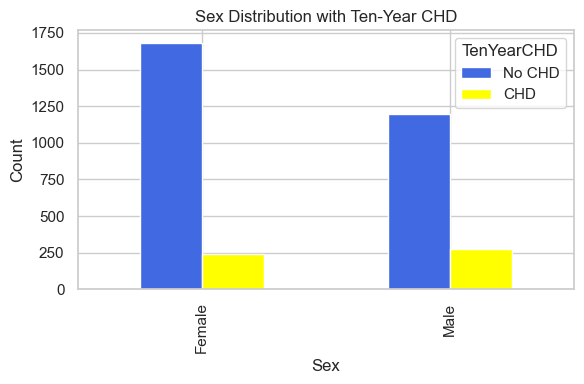

In [139]:
plt.rcParams['figure.figsize'] = (6, 4)

cv.groupby(['sex', 'TenYearCHD']).size().unstack().plot(
    kind='bar',
    color=['royalblue', 'yellow']
)

plt.title('Sex Distribution with Ten-Year CHD')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])
plt.tight_layout()
plt.show() 

More females overall in dataset (see earlier: F=1923, M=1467), CHD is more common among males proportionally,
Even though both sexes can get CHD, males may have higher relative risk.

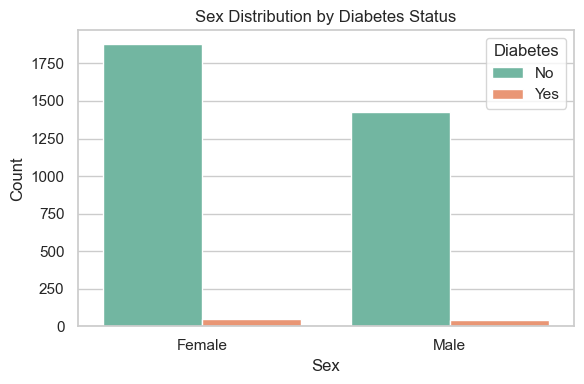

In [141]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(
    data=cv,
    x="sex",
    hue="diabetes",
    palette="Set2"
)
plt.title("Sex Distribution by Diabetes Status")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Slightly more female diabetics than male, but the count is very low overall

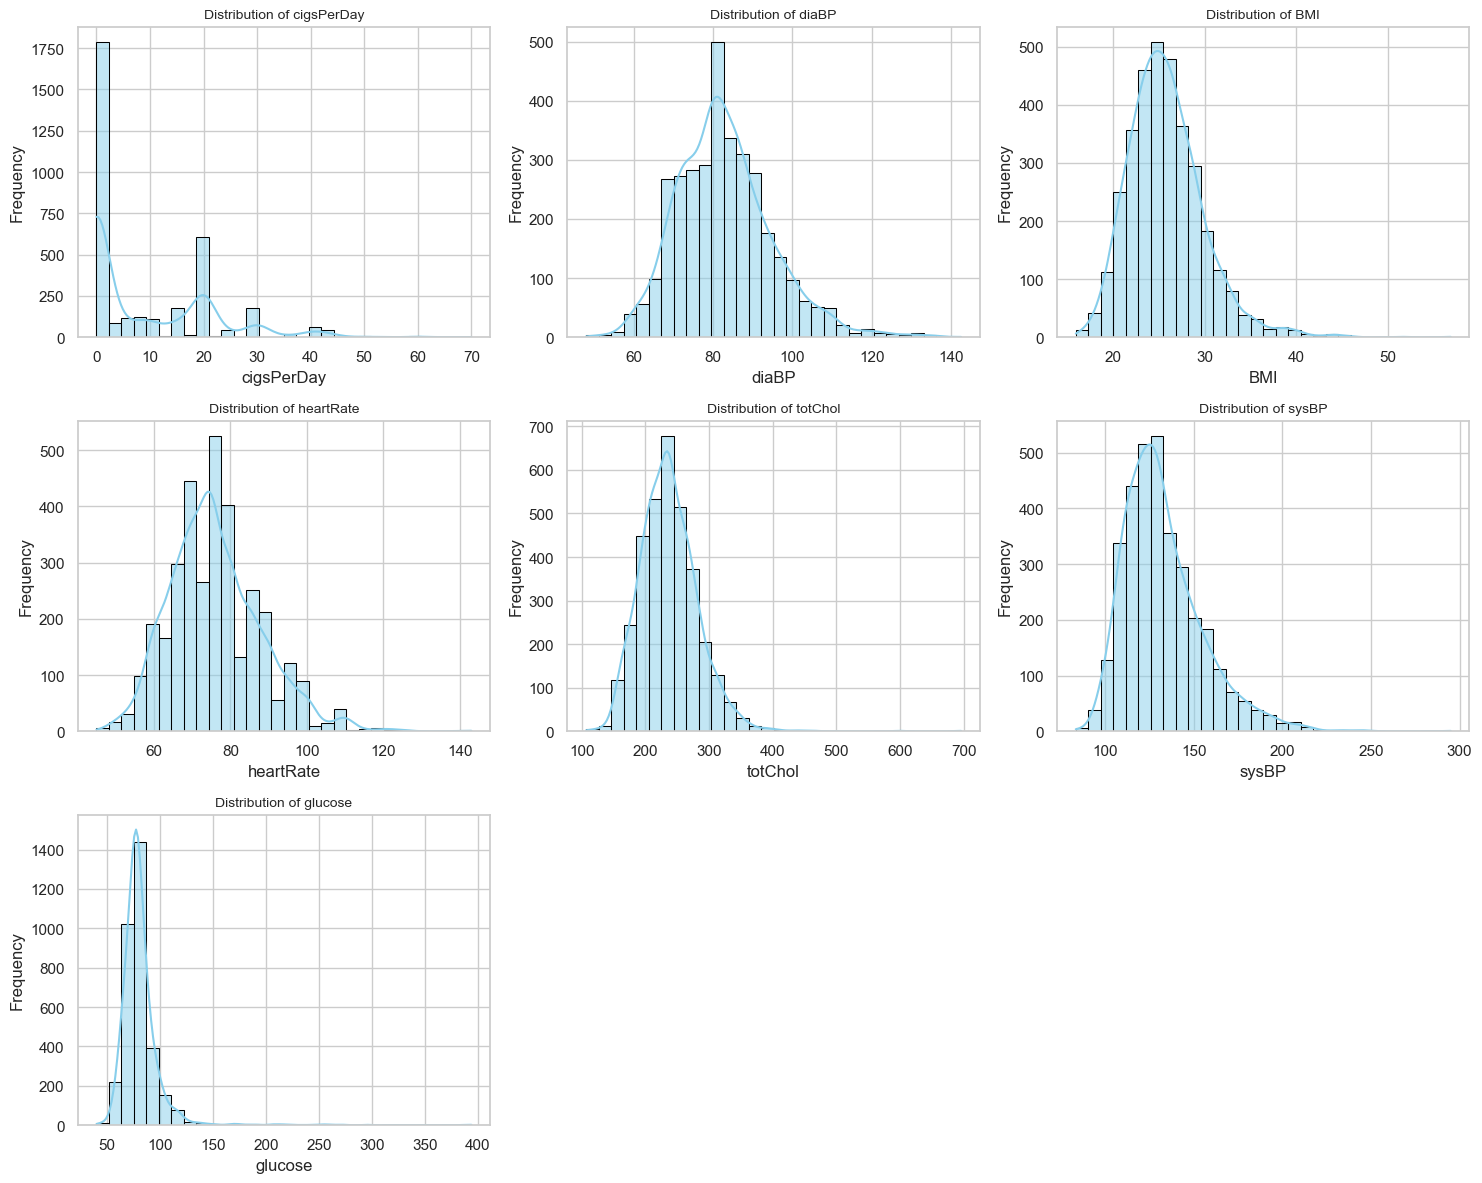

In [143]:
features = [
    'cigsPerDay', 
    'diaBP', 'BMI', 'heartRate',
    'totChol', 'sysBP', 'glucose'
]

rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(
        data=cv,
        x=feature,
        kde=True,
        bins=30,
        color='skyblue',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {feature}", fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

cigsPerDay - Many non-smokers (0), few heavy smokers. 
diaBP - are right-skewed, with some high outliers. BMI - Most values are between 22 and 30, with a few outliers over 40.
heartRate - Roughly normal distribution centered around 70–80 bpm, a few outliers over 100. 
totChol - Right-skewed — most values between 200–300, but with outliers up to 700+.
sysBP - Right-skewed — most between 120–150, with long tail reaching 248. 
glucose - Very right-skewed — most people between 70–100, but outliers spike up to 348, indicating strong outliers.

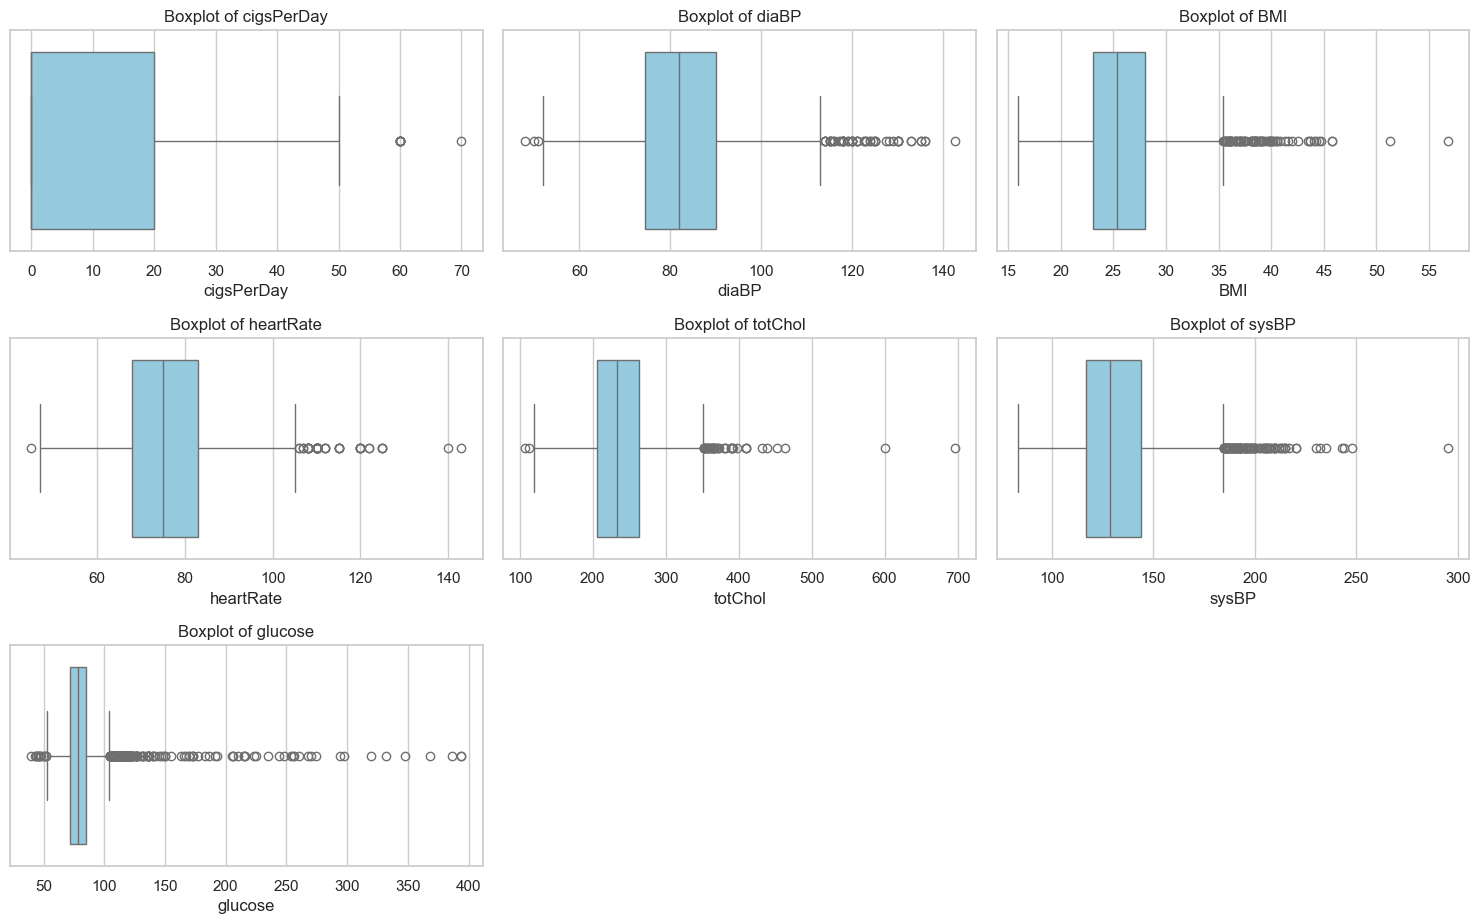

In [145]:
features = [
    'cigsPerDay',
    'diaBP', 'BMI', 'heartRate', 
    'totChol', 'sysBP', 'glucose'
]

rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=cv[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

cigsPerDay - Majority of values lie between 0–20. There's a long right tail — clear outliers (some > 50 cigarettes/day).
diaBP - Looks mostly normal, centered around 80 mmHg, but has several outliers > 100 and up to 136 — those are worth checking (possible hypertension).
BMI - Mostly concentrated between 22–30, but clear outliers above 35–44, likely indicating obesity. 
heartRate - Normal range is ~60–100 bpm. Several outliers above 100, some even >120–140, which could be due to stress, illness, or data errors.
TotChol - Clear right-skew with values > 300 and a few outliers up to 700. 
sysBP - Slight right skew. Most readings between 120–150, but visible outliers >180 and even past 240, which are high hypertension levels.
glucose - Very skewed. Outliers > 200 and a few extreme ones > 300. 

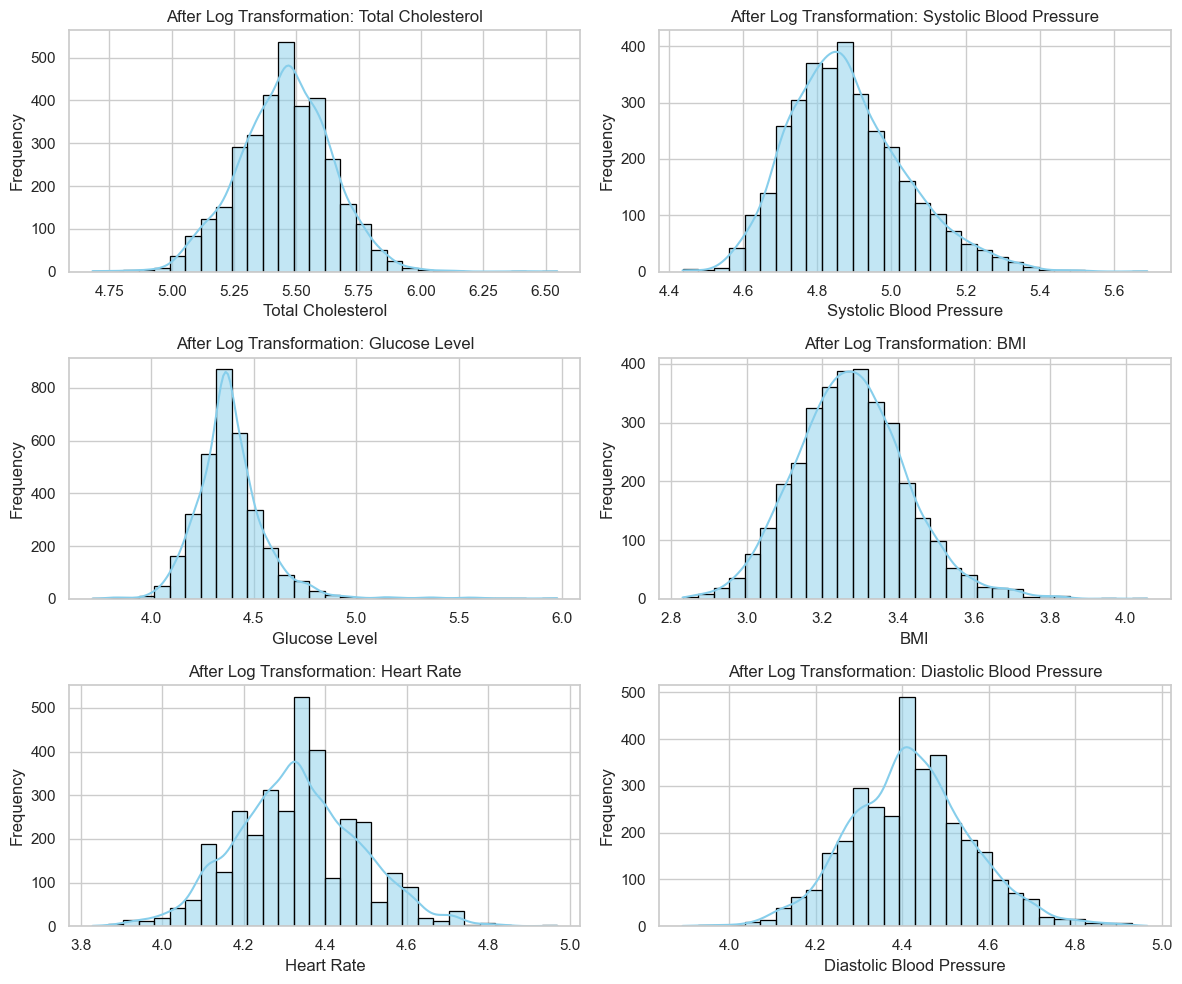

In [147]:
cv['log_totChol'] = np.log(cv['totChol'] + 1)
cv['log_sysBP'] = np.log(cv['sysBP'] + 1)
cv['log_glucose'] = np.log(cv['glucose'] + 1)
cv['log_BMI'] = np.log(cv['BMI'] + 1)
cv['log_heartRate'] = np.log(cv['heartRate'] + 1)
cv['log_diaBP'] = np.log(cv['diaBP'] + 1)

log_features = {
    'log_totChol': "Total Cholesterol",
    'log_sysBP': "Systolic Blood Pressure",
    'log_glucose': "Glucose Level",
    'log_BMI': "BMI",
    'log_heartRate': "Heart Rate",
    'log_diaBP': "Diastolic Blood Pressure"
}

plt.figure(figsize=(12, 10))
for i, (col, title) in enumerate(log_features.items()):
    plt.subplot(3, 2, i + 1)
    sns.histplot(cv[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"After Log Transformation: {title}")
    plt.xlabel(title)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Total Cholesterol - Now follows a near-normal distribution, this transformation reduced right skew and extreme outliers.
Systolic Blood Pressure - Much less skewed, more centered, smoothed long tail from high BP values.
Glucose Level - Strong improvement — now symmetric, important, because glucose had huge outliers before.
BMI	Mild right skew removed.

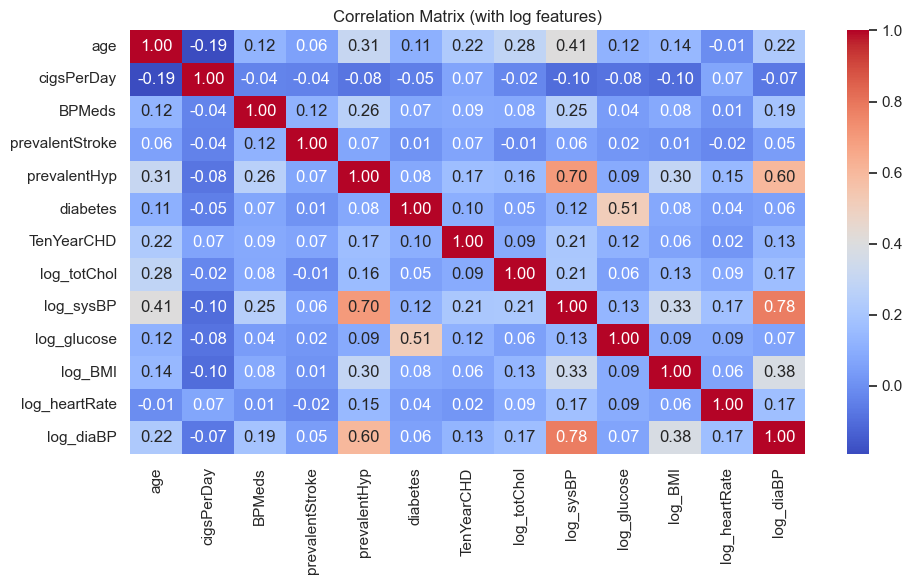

In [149]:
cv_corr = cv.drop(columns=['totChol', 'sysBP', 'glucose', 'heartRate', 'BMI', 'diaBP'])

correlation_matrix = cv_corr.corr(numeric_only=True)

target_corr = correlation_matrix['TenYearCHD'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (with log features)")
plt.tight_layout()
plt.show()

log_sysBP and log_diaBP = 0.78 Systolic and diastolic blood pressure are physiologically connected — high systolic usually comes with high diastolic. These are blood pressure components, so naturally correlated.
prevalentHyp and log_sysBP = 0.70  People with hypertension tend to have elevated systolic blood pressure. Hypertension is defined by persistently high blood pressure.
This confirms prevalentHyp as a strong indicator of blood pressure problems and cardiovascular risk.
log_sysBP and age = 0.41 As people age, arterial stiffness increases, leading to higher blood pressure. Aging is a well-known risk factor for hypertension and CHD.
log_glucose and diabetes = 0.51 high glucose levels are associated with diabetes. This is expected — diabetes is diagnosed based on elevated glucose.
log_diaBP and prevalentHyp correlation = 0.60 This makes clinical sense because hypertension diagnosis is partially based on diastolic pressure being elevated, especially in early/mid stages of hypertension.


### Modeling LogisticRregression

In [152]:
X = cv[['age', 'log_sysBP', 'BMI', 'prevalentHyp', 'diabetes', 'BPMeds', 'log_totChol', 'log_glucose']]
y = cv['TenYearCHD']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [154]:
clf = LogisticRegression(class_weight='balanced', max_iter=10000)
clf.fit(X_train, y_train) 

LogisticRegression(class_weight='balanced', max_iter=10000)

In [155]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=0)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       574
           1       0.23      0.60      0.33       104

    accuracy                           0.62       678
   macro avg       0.56      0.61      0.53       678
weighted avg       0.79      0.62      0.68       678



Accuracy 0.62 62% of predictions are correct overall, but misleading due to imbalance.
Macro avg 0.53 Average of both classes equally (treats CHD and non-CHD equally).
Weighted avg 0.68 Takes class sizes into account — closer to accuracy.

In [157]:
clf.coef_

array([[ 0.05846188,  2.04083356, -0.00809967,  0.11525334,  0.57301604,
        -0.09486118,  0.51047306,  0.4310685 ]])

Got the model coefficients LogisticRegression classifier: age +0.058 Slightly increases CHD risk with age. log_sysBP +2.041 Strongest positive effect, high systolic BP greatly increases CHD odds.
BMI	-0.008 Very small — little to no influence. prevalentHyp +0.115 Having a history of hypertension increases CHD risk.
diabetes +0.573 Diabetics are more likely to develop CHD. BPMeds -0.094 Taking BP meds higher baseline risk (already under treatment). 
log_totChol +0.51 Slight effect — high cholesterol increases risk modestly. 
log_glucose	+0.43 Higher glucose → higher CHD risk (makes sense).

In [159]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [160]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6626106194690266
The accuracy on test data is  0.6238938053097345


The model correctly predicts whether a person will or won’t develop CHD in:
~66% of training cases
~62% of test cases
Model is not overfitting — it performs similarly on known and test data. Train/test gap is small, so no major overfitting.

In [162]:
cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[1531  774]
 [ 141  266]]
Confusion Matrix for Test Data
[[361 213]
 [ 42  62]]


Confusion Matrix for training Data: 1531 True Negatives, 774 False Positives are high predicting CHD, 
141 False Negatives missed real CHD cases, 266 True Positives.
Confusion Matrix for Test Data: 361 True Negatives,	213 False Positives, 42 False Negatives, 62 True Positives.

In [164]:
f1_score(y_test, y_pred)

0.32717678100263853

A value of 0.33 (or 33%) means model is doing moderately well at catching CHD cases while not producing too many false alarms.

In [166]:
y_proba = clf.predict_proba(X_test)[:, 1]

In [167]:
roc_auc_score(y_test, y_proba)

0.663880326990083

Distinguish between classes,  score of 0.66 indicates model has fair to moderate predictive power — it can rank CHD-positive individuals better than random.

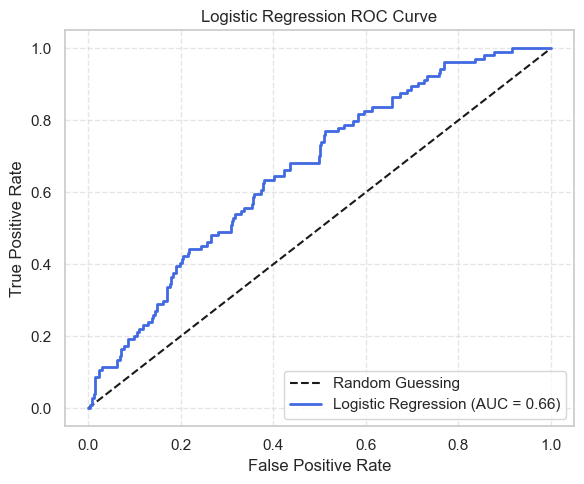

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})',
         color='royalblue', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Model performs better than random at distinguishing people with vs. without CHD. This is moderate classification performance.
Curve shape Indicates model is correctly ranking positive cases higher than negative ones at many thresholds.

In [215]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f" Optimal Threshold: {optimal_threshold:.3f}")
print(f" Max F1-score at that threshold: {optimal_f1:.3f}")

 Optimal Threshold: 0.491
 Max F1-score at that threshold: 0.340


Optimal Threshold 0.491	If predicted CHD probability is ≥ 0.491, you classify it as CHD = 1 (positive).
Max F1-score 0.340 This is the best balance between precision and recall model can achieve with current features.

In [217]:
y_pred_opt = (y_proba >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

[[356 218]
 [ 38  66]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.74       574
           1       0.23      0.63      0.34       104

    accuracy                           0.62       678
   macro avg       0.57      0.63      0.54       678
weighted avg       0.80      0.62      0.67       678



Accuracy: 0.62, Recall (CHD) = 0.63 model caught 63% of all real CHD cases. Precision = 0.23 many people flagged as high-risk do not actually have CHD.


#### Conclusion from Analysis:
The optimal probability threshold (0.491) was identified to maximize the F1-score.
The model achieved:
Recall (CHD) = 63% it successfully identified the majority of patients at risk.
Precision (CHD) = 23% some false positives, which is expected in a recall-optimized model.
Overall accuracy = 62% moderate, but not the key metric due to class imbalance.
ROC AUC of 0.66 means model performs better than random and has a decent ability to distinguish CHD vs. non-CHD patients.
Applying the optimal threshold improved sensitivity (recall), which is important in medical predictions.
The most influential predictors were:
log_sysBP (systolic blood pressure), BPMeds (use of blood pressure medication), diabetes and log_glucose
These features align with clinical understanding of cardiovascular risk factors.

#### Possible Improvements 
Trying more complex and powerful classification models like Random Forest, Gradient Boosting it may capture non-linear patterns better.